In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
url="Downloads/redwine.csv"
df=pd.read_csv(url,sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
x=df.drop("quality",axis=1)
y=df['quality']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [17]:
import shap
explainer=shap.LinearExplainer(model,X_train,feature_perturbation="correlation_dependent")
shap_values=explainer.shap_values(X_test)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
shap_df=pd.DataFrame(shap_values,columns=x.columns)


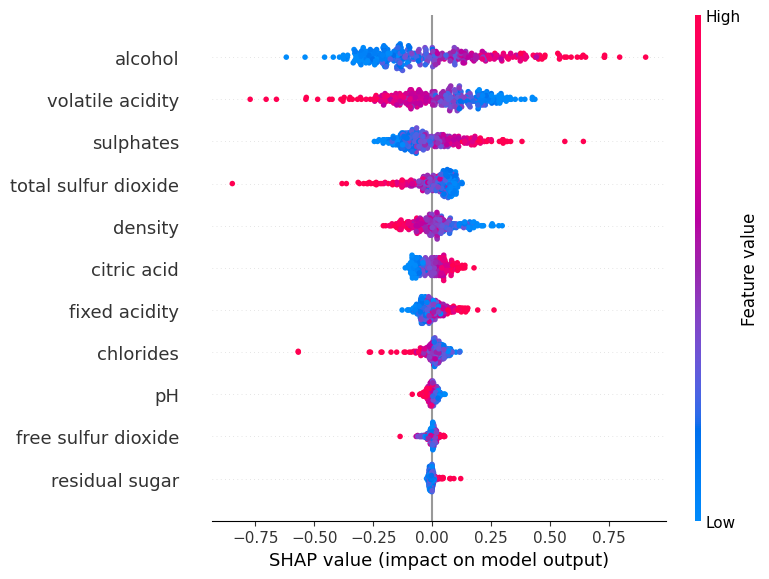

In [20]:
shap.summary_plot(shap_values,X_test,feature_names=x.columns)

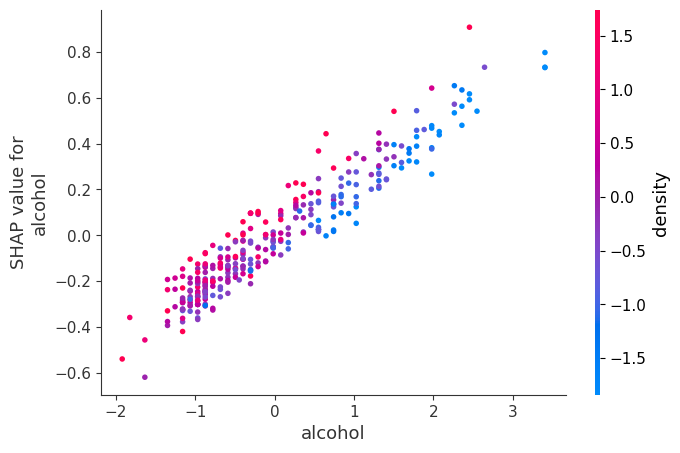

In [21]:
shap.dependence_plot('alcohol',shap_values,X_test,feature_names=x.columns)

In [24]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=x.columns)